In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as pl

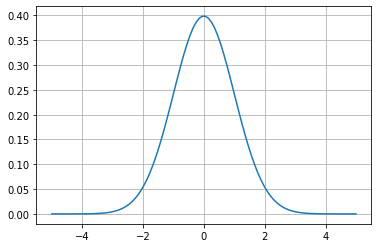

In [2]:
n = np.linspace(-5,5,100)
var = 1
dev_est = np.sqrt(var)
media = 0

fdp = (1/(np.sqrt(var*2*np.pi)))*np.exp(-0.5*((n-media)**2/var))

pl.plot(n,fdp)
pl.grid()

In [3]:
#Utilizando la función randn

N=1000

varianza = 5
dev_estandar = np.sqrt(varianza)

media = 2

x = np.matlib.randn(N,1) * dev_estandar + media;
#print(x)

numpy.matrix

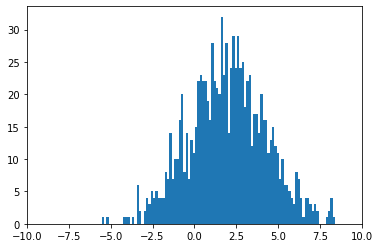

In [4]:
pl.hist(x,bins=100,histtype = 'bar');
pl.xlim(-10,10);

type(x)

In [218]:
def aleatorio_uniforme(cantidad, semilla=3355):
    
    c=12345
    m=32768
    a=1103515245
    
    x=[]
    aux = semilla
    
    for i in range(cantidad):
        aux = (a*aux + c) % m
        x.append(aux/m)
        
    return np.array(x)-0.5
    
def aleatorio_gauss(cantidad, semilla=3355):
    
    x = []
    
    for i in range(cantidad):
        y = aleatorio_uniforme(10,semilla*i);
        y = sum(y)/len(y)
        #y = sum(y)
        x.append(y*10)
    
    return np.array(x)

def aleatorio_unimodal(cantidad, varianza, media, semilla=3355):
    
    dev = np.sqrt(varianza)
    return aleatorio_gauss(cantidad,semilla)*dev + media
   
#def aleatoria_2d(cantidad, varianza, media, semilla=3355):
    
    
    

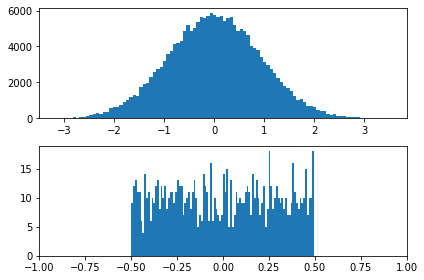

In [219]:
un_x = aleatorio_gauss(200000)
mi_x = aleatorio_uniforme(1000)


fig, ax = pl.subplots(2, 1, sharey=False, tight_layout=True)

ax[0].hist(un_x,bins=100,histtype = 'bar');
ax[1].hist(mi_x,bins=100,histtype = 'bar');

pl.xlim(-1,1);


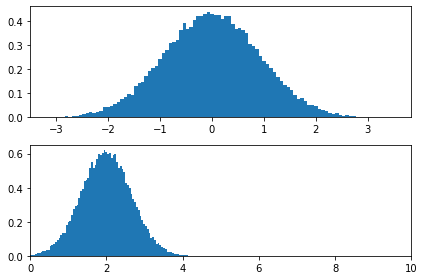

In [222]:
varianza = 0.5
dev_estandar = np.sqrt(varianza)
media = 2

x = un_x*dev_estandar + media


fig, ax = pl.subplots(2, 1, sharey=False, tight_layout=True)

ax[0].hist(un_x,bins=100,histtype = 'bar',density=True);
ax[1].hist(x,bins=100,histtype = 'bar',density=True);
pl.xlim(0,10);

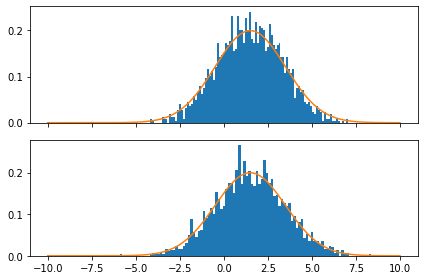

In [224]:
un_x = aleatorio_gauss(2000)
otro_x = np.random.randn(2000)
# Caracteristicas de la distribución
varianza = 4
media = 1.5

#Distribución
#x = un_x*dev_estandar + media
x = aleatorio_unimodal(2000, varianza, media)

#Función de densidad de probabilidad
n = np.linspace(-10,10,2000)
factor = 1/(np.sqrt(2*np.pi*varianza))
fdp = factor * np.exp(-((n-media)**2)/(2*varianza))

fig, ax = pl.subplots(2, 1, sharex=True, tight_layout=True)

den=ax[0].hist(x,bins=100,histtype = 'bar',density=True,stacked=True);
ax[0].plot(n,fdp);
#ax[1].hist(x,bins=100,histtype = 'bar');
den2=ax[1].hist(otro_x*np.sqrt(varianza)+media,bins=100,histtype = 'bar',density=True);
ax[1].plot(n,fdp);
#ax[1].plot(n,fdp);
#pl.xlim(-10,10);

# sum(den[1])

from functools import reduce

def aleatorio_uniforme_mdim(dim=[2,10],semilla=3355):
    
#    c=12345
#    m=32768
#    a=1103515245  
#    aux=1
#    for i in dim:
#        aux = [aux]*i
#    aux=tuple(aux)
#    x=np.empty_like(aux)
#    aux = [semilla]*dim[0]*dim[1]
#    while d < (dim[0]*dim[1]):
#        for i in range(cantidad):
#            aux = (a*aux + c) % m
#            x.append(aux/m)

    N = reduce(lambda x, y : x*y , dim)
    
    n = np.linspace(semilla,(semilla+N)*3,N)
    b = np.reshape(n,dim)
    
    c=12345
    m=32768
    a=1103515245
    
    x = ((a*b+c)%m)/m-0.5        
        
    return np.array(x)

In [212]:
import time
    
def aleatorio_gauss_mdim(dim=[2,10], semilla=3355):
    
    x = []  
    
    for i in range(dim[0]):
        aux = aleatorio_gauss(dim[1],time.clock_gettime(time.CLOCK_MONOTONIC))
        x.append(aux)
    
    return np.array(x)*10

def aleatorio_multimodal_mdim(dim, covarianza, media):
    
    data = aleatorio_gauss_mdim(dim)
    
    data = (data.T @ np.sqrt(covarianza)).T + media
    
    #dev = np.sqrt(varianza)
    return data

(-2.0, 2.0)

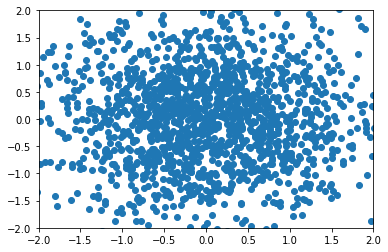

In [175]:
y=aleatorio_gauss_mdim([2,1500])

pl.scatter(y[0],y[1])
pl.xlim(-2,2)
pl.ylim(-2,2)

In [213]:
data=aleatorio_gauss_mdim([2,11500])




EPS = np.array([[25,4],[4,16]])

data = (data.T @ np.sqrt(EPS)).T+[[5],[10]]


data2 = aleatorio_multimodal_mdim([2,11500],EPS,[[-5],[-10]])

#pl.scatter(y[0]*10,y[1]*10)
#pl.xlim(-2,2)
#pl.ylim(-2,2)


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
pl.figure(figsize=(8, 8))

ax_scatter = pl.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = pl.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = pl.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(data[0], data[1])
ax_scatter.scatter(data2[0], data2[1])

# now determine nice limits by hand:
binwidth = 0.1
lim = np.ceil(np.abs([data[0], data[1]]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(data[0], bins=bins) 
ax_histy.hist(data[1], bins=bins, orientation='horizontal')

ax_histx.hist(data2[0], bins=bins) 
ax_histy.hist(data2[1], bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

pl.show()

In [217]:
print(data[1].std())
print(data2[1].std())

4.088751314564435
4.1127313014703555


In [186]:
from numpy import linalg as la

EPS = np.array([[4,2],[2,9]])

w,v = la.eig(EPS)
v

array([[-0.94362832, -0.33100694],
       [ 0.33100694, -0.94362832]])

In [159]:
from functools import reduce
N = reduce(lambda x, y : x*y , dim)

n = np.linspace(1,N*3,N)

b = np.reshape(n,dim)

c=12345
m=32768
a=1103515245

((a*b+c)%m)/m

array([[0.98944092, 0.51925659, 0.04907227, 0.57888794, 0.10870361],
       [0.63851929, 0.16833496, 0.69815063, 0.22796631, 0.75778198]])

In [28]:
dim

[2, 5]

In [29]:
from functools import reduce
N = reduce(lambda x, y : x*y , dim)

n = np.linspace(1,N*3,N)

np.reshape(n,dim)

array([[ 1.        ,  4.22222222,  7.44444444, 10.66666667, 13.88888889],
       [17.11111111, 20.33333333, 23.55555556, 26.77777778, 30.        ]])

In [30]:
np.reshape(n,dim)

array([[ 1.        ,  4.22222222,  7.44444444, 10.66666667, 13.88888889],
       [17.11111111, 20.33333333, 23.55555556, 26.77777778, 30.        ]])

3019.443240677